In [47]:
#Je reviens à quelque chose de beaucoup plus simple. On va prouver que l'on obtient le bon FF pour STF classique. 
#Travaillons en mode dense, facile.
# This first version is for the classical STF. 
# Now, try to get to the domain-based STF...

import bempp.api 
import numpy as np
import mtf
from mtf.preconditioning.osrc import osrc_MtE
from mtf.utils.iterative import gmres

from bempp.api.operators.boundary.sparse import identity

from bempp.api.assembly.blocked_operator import BlockedOperator
from mtf.assembly.operators import GeneralizedBlockedOperator
from bempp.api import ZeroBoundaryOperator

from mtf.utils import bhmie
from mtf.config import config
from mtf.functions import define_bempp_functions
from matplotlib import pyplot as plt
from decimal import Decimal

bempp.api.enable_console_logging()
#M = 2

M = 3

mtf.config.set_case("B")

tangential_trace, neumann_trace = define_bempp_functions(config)

k0, k1 = config["k_ext"], config["k_int"]
lambda_par, freq = config["lambda"], config["frequency"]

polarization = config["polarization"]
direction = config["direction"]

eps_rel = config["eps_rel"]
mu_rel = config["mu_rel"]
mu0 = config["mu_ext"]
mu1 = mu_rel * mu0

eta_rel = np.sqrt(mu_rel / eps_rel)

print("The exterior wavenumber is: {0}".format(k0))
print("The interior wavenumber is: {0}".format(k1))

print("----")
print("The exterior wavelenght is: {0}".format(lambda_par))
print("The exterior frequency is: {:.2E}".format(Decimal(freq)))

# To do: Go to the multi-domain STF...
#segments = [[10], [10]]
#swapped_normals = [[10], []]

segments = [[10, 20], [10, 12], [12,20], [10, 20, 12]]
swapped_normals = [[10, 20], [], [12], []]

k_int, k_ext = config["k_int"], config["k_ext"]

n = k_int / k_ext
refIndex = n
numAngles = 901
s1, s2, qext, qsca, qback, gsca = bhmie(k_ext, k_int / k_ext, numAngles)
angles = config['angles']

k_list = [k0]
eta_rel_list = [1]
mu_list = [mu0]

for index in range(M-1):
  k_list.append(k1)
  mu_list.append(mu1)
  eta_rel_list.append(eta_rel)


precision = 5

h = 2 * np.pi/(precision*k0)
grid = bempp.api.shapes.multitrace_sphere(h=h)

print(h, ': h')
print(precision, ': precision')
print(grid.number_of_edges * 2, ': N')


dA = [bempp.api.function_space(grid, "RWG", 0, segments=seg, swapped_normals=normals,
                                      include_boundary_dofs=True)
              for seg, normals in zip(segments, swapped_normals)]

p1dA = [bempp.api.function_space(grid, "DP", 1, segments=seg, swapped_normals=normals,
                                      include_boundary_dofs=True)
              for seg, normals in zip(segments, swapped_normals)]

rA = [bempp.api.function_space(grid, "RWG", 0, segments=seg, swapped_normals=normals,
                                      include_boundary_dofs=True)
              for seg, normals in zip(segments, swapped_normals)]
tA = [bempp.api.function_space(grid, "SNC", 0, segments=seg, swapped_normals=normals,
                                      include_boundary_dofs=True)
              for seg, normals in zip(segments, swapped_normals)]



multitrace_ops = []
osrc_ops = []
# > Assemble all diagonal operators
for index in range(M):
  k = k_list[index]
  mu = mu_list[index]
  eta = eta_rel_list[index]
  efie = bempp.api.operators.boundary.maxwell.electric_field(dA[index], rA[index], tA[index], k)
  mfie = bempp.api.operators.boundary.maxwell.magnetic_field(dA[index], rA[index], tA[index], k)
  zero = (1+1j) * bempp.api.ZeroBoundaryOperator(dA[index], rA[index], tA[index])
  multitrace_ops.append(GeneralizedBlockedOperator([[mfie, eta * efie],[- 1/eta * efie, mfie]]))




bempp:HOST:INFO: Created grid with id c1bd145e-257a-4d1f-aa1a-9b54da1b56b6. Elements: 792. Edges: 1174. Vertices: 385
bempp:HOST:WARNING: Setting include_boundary_dofs has no effect on this space type.
bempp:HOST:WARNING: Setting include_boundary_dofs has no effect on this space type.
bempp:HOST:WARNING: Setting include_boundary_dofs has no effect on this space type.
bempp:HOST:WARNING: Setting include_boundary_dofs has no effect on this space type.


The exterior wavenumber is: 5.0
The interior wavenumber is: 6.892024376045111
----
The exterior wavelenght is: 1.2566370614359172
The exterior frequency is: 2.39E+8

0.25132741228718347 : h
5 : precision
2348 : N


In [48]:
I = bempp.api.operators.boundary.sparse.identity(rA[index], rA[index], rA[-1])


In [49]:
I_wf = I.weak_form()

In [50]:
Ib = bempp.api.as_matrix(I_wf).A

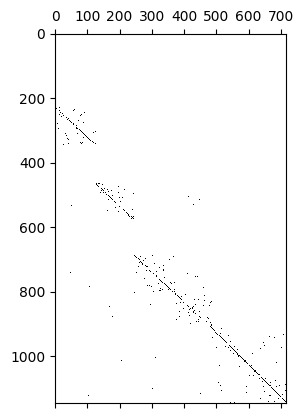

In [55]:
plt.spy(Ib)

In [16]:
from bempp.api.operators.boundary.sparse import lambda_2

In [34]:
 from bempp.api.operators.boundary.sparse import lambda_1
from bempp.api.operators.boundary.sparse import lambda_2
from bempp.api.operators.boundary.sparse import mte_operators
from bempp.api.assembly.discrete_boundary_operator import InverseSparseDiscreteBoundaryOperator
from scipy.sparse.linalg import LinearOperator
import numpy as _np

wavenumber, npade, theta, damped_wavenumber = mte.descriptor.options
dk = wavenumber + 1.0j * 0.39 * wavenumber ** (1.0 / 3) * _np.sqrt(2) ** (2.0 / 3)

mte_op = mte_operators(mte.domains_, mte.ranges_, mte.dual_to_ranges_, dk)
lambd_2 = lambda_2(mte_op).weak_form()


In [57]:
bempp.api.assembly.boundary_operator.BoundaryOperatorWithAssembler?

Init signature:
bempp.api.assembly.boundary_operator.BoundaryOperatorWithAssembler(
    domain,
    range_,
    dual_to_range,
    assembler,
    operator_descriptor,
    transpose=False,
)
Docstring:      Implements a boundary operator together with an assembler.
Init docstring: Initialize a boundary operator with assembler.
File:           /usr/local/lib/python3.10/dist-packages/bempp/api/assembly/boundary_operator.py
Type:           type
Subclasses:     

In [68]:
map_dom0_to_skeleton = identity(dA[0], dA[-1], dA[-1])

In [77]:
I_wf = map_dom0_to_skeleton.weak_form()

In [91]:
dA0.map_to_localised_space

<1884x942 sparse matrix of type '<class 'numpy.float64'>'
	with 1884 stored elements in Compressed Sparse Row format>

In [92]:
dAS = dA[-1]

In [97]:
dAS.map_to_full_grid

<2376x1146 sparse matrix of type '<class 'numpy.float64'>'
	with 2376 stored elements in Compressed Sparse Row format>

In [98]:
dA0.map_to_full_grid

<2376x942 sparse matrix of type '<class 'numpy.float64'>'
	with 1884 stored elements in Compressed Sparse Row format>

In [99]:
A0wf = A0.weak_form()

bempp:HOST:INFO: OpenCL CPU Device set to: pthread-AMD EPYC 7302 16-Core Processor
/usr/local/lib/python3.10/dist-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(
/usr/local/lib/python3.10/dist-packages/pyopencl/cache.py:499: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  prg.build(options_bytes, devices)


In [ ]:
A0wf